# <center> **Deep Learning: Supervised Seafloor classification with CNN** </center>
## <center> Machine Learning Programming Exercise 8 part 2.1: **Fine tuning**</center>

| <font size=6,font color='red'>Monôme / binôme</font> | <font size=6,font color='red'>Nom</font> | <font size=6,font color='red'>Prénom</font> |
|:-------------: |:----------- |:------ |
| binôme 1 | <span style="color:red">DUBEE</span> | <span style="color:red">Melvin</span> |
| binôme 2 | <span style="color:red">ROUDAUT</span> | <span style="color:red">Tanguy</span> |


# 0 - Introduction

Disposant d'un ensemble d'images dont on veut prédire la classe, deux possibilités s'offrent pour apprendre un modèle profond de classement basé sur une architecture CNN.

- La première possibilité se nomme "Transfer Learning" associé au "fine tuning" dont les principes sont d'utiliser un réseau de neurones profond entrainé dans un autre contexte et de l'adapter à nos données.
    
- La seconde possibilité est de créer et d'entrainer un modèle profond ex-nihilo (from scratch, en partant de zéro).

L'objectif de ce TP est d'appliquer ces deux possibilités au problème de classification de patchs d'images sonar en types de fond marin que vous avez déjà traités dans les TPs précédents.

Nous allons reprendre les fonctions d'import des patchs que vous avez déjà utilisées lors des tps précédents.

La création d'ensemble d'apprentissage, de validation et de test se fera en divisant la base en trois parts. Il faudrait pour ce petit jeu de données réaliser une procédure de cross-validation. Compte tenu du temps pour réaliser cette procédure, elle sera ici laissée de coté.


### 0.1 - Tutorials CNN et transfer learning par fine tuning

Dans un premier temps, le notebook tp2.1 détaille le fonctionnement et la mise en oeuvre des CNNs (en particulier les différentes couches d'un CNN avec des exemples); pour ensuite détailler la procédure liée au fine tuning avec data augmentation à partir de données de type TensorFlow Dataset.

Veillez à bien suivre les différentes étapes et à bien comprendre les différentes commandes employées. Si vous voulez d'autres exemples, d'autres ressources supplémentaires sont disponibles:

- Les concepts du transfer learning sont expliqués dans les liens ci-dessous:
  - https://www.youtube.com/watch?v=FQM13HkEfBk&index=20&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF
  - http://cs231n.github.io/transfer-learning/
  - https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html et https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html
- Des exemples supplémentaires d'implémentation
  - https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/CIFAR10_CNN_Classifier.ipynb et https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/CIFAR10_VGG16_Transfer_Learning_Classifier.ipynb
  - https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/Dog_Breed_EDA.ipynb et https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/Dog_Breed_Transfer_Learning_Classifier.ipynb
- cours et des vidéos de Stanford University: https://www.youtube.com/watch?v=wEoyxE0GP2M&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=6, https://www.youtube.com/watch?v=wEoyxE0GP2M&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=7)



### 0.2 - Transfer learning par fine tuning sur le dataset seafloor

- Vous commencerez par le fine tuning en vous inspirant du tuto fourni ci-dessus pour faire du transfer learning du modèle xception (dont les paramètres ont été appris sur la base d'images "imageNet") pour l'appliquer aux patchs d'images sonar. Vous procéderez ainsi:
  - compléter ce jupyter notebook  en répondant aux questions
  - Résumer l'approche du transfer learning/fine tuning
  - Décriver l'architecture du modèle utilisé (xception ici)
  - Vous précisérez votre choix concernant les paramètres des fonctions appelées en particulier expliquer votre démarche concernant les phases de preprocessing des images, de data augmentation, de classification, etc.
  - Enfin, vous évaluerez les performances obtenues.


### 0.3 - Proposition de votre propre achitecture  

- Vous proposerez ensuite une architecture de réseau profond convolutif et évaluerez ses performances.
- compléter le jupyter notebook `tp2.2_learning_cnns_from_scratch` en répondant aux questions
- Expliquez votre architecture et en particulier à quoi servent les couches (et leur enchainement) de votre architecture.
- Vous comparerez ensuite les performances obtenus (par rapport à celles obtenues à la partie précédente) sur la matrice de confusion et les métriques de performance classiques.





<FONT COLOR="#ff0000">

# A rendre pour le **12/12/23**
- **Commenter au maximum votre code (pourquoi vous utilisez tel ou tel bout de code) ou apporter des précisions dans votre CR.**
- au choix (**N'oublier pas les deux noms en cas de binômes**):
    - un fichier zip avec *.py et un CR au format pdf
    - un fichier .ipynb avec compte-rendu et code

</FONT>


# 1. Import useful packages
Pour pouvoir commencer, vous importerez les librairies suivantes:

## 1.1 Colab or not colab

In [1]:
# common imports
import sys,os,glob

# Colab preamble
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:

  # mount google drive directories
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)


  # ----------- Your code here --------------------->
  # replace the ipynb_name (below) with the name of your jupyter notebook file

  ipynb_name = 'tp2.2_learning_cnns_fine_tuning_startercode.ipynb'

  # ------------------------------------------------>

  ipynb_name = glob.glob(os.getcwd() + '/gdrive/MyDrive/machine_learning/' + ipynb_name, recursive = True)
  code_folder = os.path.dirname(ipynb_name[0])

  # change to the right folder
  %cd "$code_folder"
  !ls


Mounted at /content/gdrive
/content/gdrive/MyDrive/machine_learning
dataset        partie2.ipynb  tp2.1_tuto_cnns_startercode.ipynb
partie1.ipynb  results	      tp2.2_learning_cnns_fine_tuning_startercode.ipynb


## 1.2 Import packages

In [2]:
# Common imports
import os
from time import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from functools import partial
import pickle

# machine learning packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

print(tf.config.list_physical_devices())
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IN_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2 - Loading and visualizing the dataset

### 2.1 Loading

Les données sont les mêmes que pour le TP5. La procédure pour importer les données est légèrement différentes.

In [3]:
# ---------------------------------------------------------------------------------------------------------------
# LOAD Data, Features, Labels
# ---------------------------------------------------------------------------------------------------------------

# Définition du chemin vers le répertoire dataset pour les images et les labels
DATASET_PATH = r'./dataset/imgs/'
LABEL_PATH = r'./dataset/labels/labels.csv'

# Flag pour le chargement des images
# True for fine tuning | False for from scratch
flag_load_as_rgb = True

# Taille d'entrée du modèle (>=71 pour xception)
target_size = 200

# Import des données
def importData():

    # Charger le fichier CSV
    dataset_df = pd.read_csv(LABEL_PATH)

    # We add another column to the labels dataset to identify image path
    dataset_df['image_path'] = dataset_df.apply(lambda row: (DATASET_PATH + row["id"]), axis=1)

    # Récupération des labels
    label_names = dataset_df['seafloor']

    # Chargement des images et changement de la taille des images et duplication sur canaux RGB
    batch_imgs = []
    for img in dataset_df['image_path'].values.tolist():

        if flag_load_as_rgb:
            tmp = load_img(img, color_mode = "rgb", target_size=(target_size, target_size))
        else:
            tmp = load_img(img, color_mode = "grayscale", target_size=(target_size, target_size))

        # Converts a PIL Image instance to a Numpy array
        tmp = img_to_array(tmp)
        batch_imgs.append(tmp)

    # conversion en numpy array
    batch_imgs = np.array(batch_imgs).astype('float32')

    return batch_imgs, label_names

# call importData
batch_imgs, label_names = importData()

# variables utiles
instance_nb, height, width, channel_nb = batch_imgs.shape
feature_nb = batch_imgs.shape[1]*batch_imgs.shape[2]
channel_nb = batch_imgs.shape[-1]

print('dimension du batch d''images: {}'.format(batch_imgs.shape))
print('dimension des labels: {}'.format(label_names.shape))



dimension du batch dimages: (360, 200, 200, 3)
dimension des labels: (360,)


***

***Question 2.1: Quel est le nombre de canaux de chaque patch? Pourquoi?***

`flag_load_as_rgb = True` on les charges en rgb donc forcèment on à trois cannaux


### 2.2 - Display patches

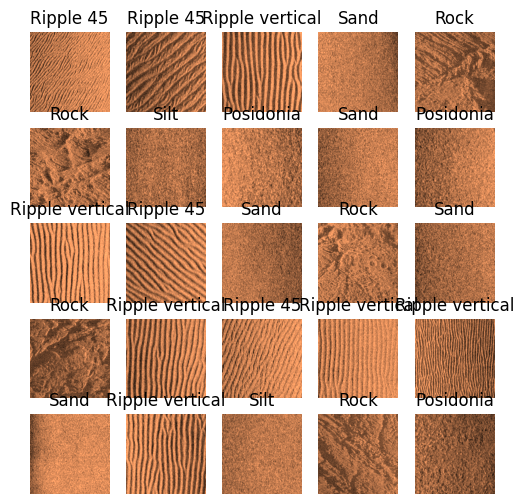

In [4]:
# Visualize a Sample Set as a grid (grid_height x grid_width)
grid_width=5
grid_height=5

# choix aléatoire d'un nombre (grid_width*grid_height) d'images à afficher
ind = np.random.randint(0, instance_nb, grid_width*grid_height)

# image counter
img_idx = 0

# display

# display a
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(6, 6)
for i in range(0, grid_width):
    for j in range(0, grid_height):
        ax[i][j].axis('off')
        ax[i][j].set_title(label_names[ind[img_idx]])
        ax[i][j].imshow(batch_imgs[ind[img_idx],:,:,0], cmap='copper')

        # update image counter
        img_idx += 1



## 3. Pré-traitements en vue de la classification

### 3.1 Séparation des données en ensembles

Les lignes suivantes de code permettent de créer trois ensembles: apprentissage, validation et test.


In [5]:
from sklearn.model_selection import train_test_split

# ---------------------------------------------------------------------------------------------------------------
# PREPARE DATASETS Split into 3 sets
# ---------------------------------------------------------------------------------------------------------------
def prepare_datasets(batch_imgs, label_names):
    print('Split into 3 sets...')

    tmp = train_test_split(batch_imgs,
                           label_names,
                           test_size=0.5,
                           stratify=np.array(label_names),
                           random_state=42)
    batch_imgs_train, batch_imgs_test, labelNames_train, labelNames_test = tmp

    tmp = train_test_split(batch_imgs_test,
                           labelNames_test,
                           test_size=0.5,
                           stratify=np.array(labelNames_test),
                           random_state=42)
    batch_imgs_test, batch_imgs_val, labelNames_test, labelNames_val = tmp

    # taille du dataset
    dataset_size = batch_imgs.shape[0]

    # nb de classes
    labelNames_unique = label_names.unique()
    label_nb = labelNames_unique.shape[0]


    return batch_imgs_train, labelNames_train, batch_imgs_val, labelNames_val, batch_imgs_test, labelNames_test

# call prepare_datasets
batch_imgs_train, labelNames_train, batch_imgs_val, labelNames_val, batch_imgs_test, labelNames_test = prepare_datasets(batch_imgs, label_names)

# Vérification des formats des ensembles
print("Format du set de train : "     , batch_imgs_train.shape)
print("Format du set de validation : ", batch_imgs_val.shape)
print("Format du set de test : "      , batch_imgs_test.shape)


Split into 3 sets...
Format du set de train :  (180, 200, 200, 3)
Format du set de validation :  (90, 200, 200, 3)
Format du set de test :  (90, 200, 200, 3)


### 3.2 Gestion des labels

Les lignes de code suivantes permettent de disposer des labels pour chaque ensemble de données dans différents [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html) (noms, indices, [one-hot-encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), etc.). Ces codages serviront dans la suite.



In [6]:
# ---------------------------------------------------------------------------------------------------------------
#  transformation des labels selon différents codages
# ---------------------------------------------------------------------------------------------------------------

#  Noms des labels
labelNames_unique = label_names.unique()

# nb de classes
label_nb = labelNames_unique.shape[0]

# enc labelNames to indices
encName2Ind = preprocessing.LabelEncoder()
encName2Ind.fit(labelNames_unique)
labelIndices_unique = encName2Ind.transform(labelNames_unique)
labelIndices  = encName2Ind.transform(label_names)

# enc indices to  one-hot-encoding
encInd2Ohe = preprocessing.OneHotEncoder(sparse=False)
encInd2Ohe.fit(labelIndices_unique.reshape(-1, 1))
labelOhe = encInd2Ohe.transform(labelIndices.reshape(-1, 1))

# enc labelNames to  one-hot-encoding
encName2Ohe = preprocessing.OneHotEncoder(sparse=False)
encName2Ohe.fit(labelNames_unique.reshape(-1, 1))
#labelOhe2 = encName2Ohe.transform(label_names.reset_index(drop=True).values.reshape(-1, 1))


# Conversion des noms des labels en indices
labelInd_train = encName2Ind.transform(labelNames_train)
labelInd_val = encName2Ind.transform(labelNames_val)
labelInd_test = encName2Ind.transform(labelNames_test)

# Conversion des noms des labels en  one-hot-encoding
labelOhe_train = encName2Ohe.transform(labelNames_train.reset_index(drop=True).values.reshape(-1, 1))
labelOhe_val   = encName2Ohe.transform(labelNames_val.reset_index(drop=True).values.reshape(-1, 1))
labelOhe_test  = encName2Ohe.transform(labelNames_test.reset_index(drop=True).values.reshape(-1, 1))

# autre solution avec panda
# labelOhe_train = pd.get_dummies(labelNames_train.reset_index(drop=True)).values
# labelOhe_val   = pd.get_dummies(labelNames_val.reset_index(drop=True)).values
# labelOhe_test  = pd.get_dummies(labelNames_test.reset_index(drop=True)).values



# ---------------------------------------------------------------------------------------------------------------
# DATASETS Summary
# ---------------------------------------------------------------------------------------------------------------
#  Noms et indices des labels
labelNames_unique   = label_names.unique()
labelIndices_unique = encName2Ind.transform(labelNames_unique)
label_nb            = labelNames_unique.shape[0]

# taille du dataset
dataset_size = batch_imgs.shape[0]

print('------------------------------')
print('Seafloor Training Set Summary ')
print('------------------------------')
print('Feature Shape:', batch_imgs_train.shape)
print('Labels Shape:', labelNames_train.shape)
print('labels distrib over labels:', [sum(labelInd_train == ind) for ind in labelIndices_unique])
print('------------------------------')
print('Seafloor Validation Set Summary ')
print('------------------------------')
print('Validation Features Shape:', batch_imgs_val.shape)
print('Validation Labels Shape:', labelNames_val.shape)
print('labels distrib over classe:', [sum(labelInd_val == ind) for ind in labelIndices_unique])
print('------------------------------')
print('Seafloor Testing Set Summary ')
print('------------------------------')
print('Testing Features Shape:', batch_imgs_test.shape)
print('Testing Labels Shape:', labelNames_test.shape)
print('labels distrib over classe:', [sum(labelInd_test == ind) for ind in labelIndices_unique])
print('------------------------------')
print('Split into 3 sets...done')


print('Encoding done...')


------------------------------
Seafloor Training Set Summary 
------------------------------
Feature Shape: (180, 200, 200, 3)
Labels Shape: (180,)
labels distrib over labels: [30, 30, 30, 30, 30, 30]
------------------------------
Seafloor Validation Set Summary 
------------------------------
Validation Features Shape: (90, 200, 200, 3)
Validation Labels Shape: (90,)
labels distrib over classe: [15, 15, 15, 15, 15, 15]
------------------------------
Seafloor Testing Set Summary 
------------------------------
Testing Features Shape: (90, 200, 200, 3)
Testing Labels Shape: (90,)
labels distrib over classe: [15, 15, 15, 15, 15, 15]
------------------------------
Split into 3 sets...done
Encoding done...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 3.3 Transformation des ensembles en objet tf.data.Dataset

In [53]:
# ---------------------------------------------------------------------------------------------------------------
# Création du dataset en objet tf.data.Dataset
# ---------------------------------------------------------------------------------------------------------------

ds_train = tf.data.Dataset.from_tensor_slices((batch_imgs_train, labelInd_train))
ds_val = tf.data.Dataset.from_tensor_slices((batch_imgs_val, labelInd_val))
ds_test = tf.data.Dataset.from_tensor_slices((batch_imgs_test, labelInd_test))

# variables utiles
train_instance_nb = ds_train.cardinality().numpy()
print("train_instance_nb:", train_instance_nb)
val_instance_nb = ds_val.cardinality().numpy()
print("val_instance_nb:", val_instance_nb)
test_instance_nb = ds_test.cardinality().numpy()
print("test_instance_nb:", test_instance_nb)


train_instance_nb: 180
val_instance_nb: 90
test_instance_nb: 90


## 4. Fine tune a pretrained model for seafloor classification

### 4.1  XCEPTION model

Vous commencerez par le fine tuning du modèle XCEPTION en vous inspirant du tuto fourni (dont les paramètres ont été appris sur la base d'images "imageNet") pour l'appliquer aux patchs d'images sonar. Vous procéderez ainsi (attention les réponses à ces questions sont toutes notées):
- Suivre les différentes étapes du tuto.
- Décrire l'architecture du modèle utilisé (xception ici): nombre de paramètres entrainables et non entrainables, particularités par rapport aux auters réseaux, etc.
- Vous précisérez votre choix concernant les paramètres des fonctions appelées. En particulier expliquer votre démarche concernant les phases de preprocessing des images, de data augmentation, de couches de classification, etc.
- **remarque**: comme les images sonar sont en niveaux de gris et que le modèle VGG prend en entrée des images couleurs, il s'agira de dupliquer ce canal sur les canaux R, G et B.

- Enfin, vous évaluerez proprement les performances obtenues (learning curves, matrice de confusion).



#### 4.1.1 Paramètres  (Optionnel)

In [ ]:
# ----------- Your code here --------------------->


# ------------------------------------------------>

#### 4.1.2 Data preprocessing (potentiellement resize, normalisation, data augmentation)

In [54]:
# ----------- Your code here --------------------->
from functools import partial


def central_crop(image): #1
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image): #2
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False): #3
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)

    resized_image = tf.image.resize(cropped_image, [200, 200])
    final_image = keras.applications.xception.preprocess_input(resized_image)

    return final_image, label


batch_size = 16

ds_train = ds_train.shuffle(1000).repeat()
ds_train = ds_train.map(partial(preprocess, randomize=True)) #4
ds_train = ds_train.batch(batch_size)

ds_val = ds_val.map(preprocess).batch(batch_size) #5
ds_test = ds_test.map(preprocess).batch(batch_size) #5



# ------------------------------------------------>

**Question: Expliquez votre code. Quels sont vos choix?**

1. Nous utilisons la fonction central_crop évoqué dans le tp précédent pour ne pas perdre les informations importante qui se trouve géralement au centre de l'image
2. Nous utilisons la fonction random_crop évoqué dans le tp précédent pour rogner les images aléatoires ce qui permet d'ajouter de la diversité dans les données
3. la fonction preprocess permet d'appeler la fonction de crop random et de faire une rotation si randomize=True, sinon on utilise crop center. Pour finir on resize nos images cropé en 200x200 comme à l'initial. Il n'est pas nécessaire de modifier la taille de l'image initial, elle doit être au minimu de 71x71, et 3 channel ce qui est notre cas comme on les a load en rgb et elle font 200x300. La fonction preprocess_input permet d'apter notre image pour le model xception et de les normaliser entre -1 et 1
4. On utiliser la fonction preproces avec randomize=True pour ajouter de la diversité dans le jeu d'entrainement
5. On utiliser la fonction preprocess avec randomize=False pour ne pas perdre l'infomration principal car le jeu de test et validation doivent etre proche de l'authenticité
6. On oublie pas de rebatcher pour une meilleur perf

#### 4.1.3 Model definition

In [68]:
# ----------- Your code here --------------------->
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
avg = keras.layers.Dense(256, activation='relu')(avg)
avg = keras.layers.Dropout(0.5)(avg)
output = keras.layers.Dense(label_nb, activation="softmax")(avg)

model = keras.models.Model(inputs=base_model.input, outputs=output)
model.summary()
# ------------------------------------------------>

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_28 (InputLayer)       [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 99, 32)           864       ['input_28[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 99, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 99, 32)           0         ['block1_conv1_bn[0][0]

On fige les couches seulement lors de l'apprentissage pour affiner nos parametres, apres avoir obtenu un score de 70% 80% on peut garder nos parametre defiger les couches et reapprendre le model

#### 4.1.4 Learning the model

In [69]:
# ----------- Your code here --------------------->
# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = False

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 5 # pour tester quand c'est figer
history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)


# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = True

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.legacy.SGD(learning_rate=0.0001, momentum=0.9, decay=0.01)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 50

history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)

# ------------------------------------------------>

Epoch 1/5
16/16 [==============================] - 6s 139ms/step - loss: 1.3887 - accuracy: 0.4297 - val_loss: 0.9415 - val_accuracy: 0.6667
Epoch 2/5
16/16 [==============================] - 1s 74ms/step - loss: 0.8022 - accuracy: 0.7109 - val_loss: 0.6389 - val_accuracy: 0.7292
Epoch 3/5
16/16 [==============================] - 1s 82ms/step - loss: 0.5765 - accuracy: 0.8086 - val_loss: 0.5168 - val_accuracy: 0.9167
Epoch 4/5
16/16 [==============================] - 1s 74ms/step - loss: 0.4746 - accuracy: 0.8828 - val_loss: 0.4579 - val_accuracy: 0.8750
Epoch 5/5
16/16 [==============================] - 1s 74ms/step - loss: 0.4225 - accuracy: 0.8867 - val_loss: 0.4171 - val_accuracy: 0.8958
Epoch 1/50
16/16 [==============================] - 9s 310ms/step - loss: 1.7612 - accuracy: 0.3047 - val_loss: 0.5763 - val_accuracy: 0.7292
Epoch 2/50
16/16 [==============================] - 4s 234ms/step - loss: 1.5437 - accuracy: 0.3320 - val_loss: 0.7146 - val_accuracy: 0.6667
Epoch 3/50
16/1

#### 4.1.5 Evaluating the model

In [70]:
# ----------- Your code here --------------------->
test_loss, test_accuracy = model.evaluate(ds_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# ------------------------------------------------>

6/6 [==============================] - 1s 208ms/step - loss: 0.7781 - accuracy: 0.7778
Test Loss: 0.7780575156211853
Test Accuracy: 0.7777777910232544


#### 4.1.6 Saving the model

In [71]:
# Save model
RESULT_PATH = './results'

def save_model(model_type):
    # description
    json_finename = RESULT_PATH+'/'+model_type+"_finetunedmodel.json"
    model_finename = RESULT_PATH+'/'+model_type+"_finetunedmodel.h5"
    weights_filename = RESULT_PATH+'/'+model_type+"_finetunedweights.h5"
    hist_filename = RESULT_PATH+'/'+model_type+"_finetunedhistory.npy"


    # save json model
    model_json = model.to_json()
    with open(json_finename, "w+") as json_file:
        json_file.write(model_json)

    # save model and weights
    model.save(model_finename)

    # save weights of the model
    model.save_weights(weights_filename)
    print("Model saved to disk")

    # Fit history saving
    np.save(hist_filename, history.history)

    # with open(hist_filename, "w") as file_pi:
    #      pickle.dump(history.history, file_pi)

save_model('xception')




Model saved to disk


**Question 4.1: Décrivez l'approche du fine tuning**

**_`Double cliquez ici pour écrire votre réponse ici!`_**


**Question 4.2: Décrire l'architecture du modèle utilisé (xception ici)**

**_`Double cliquez ici pour écrire votre réponse ici!`_**

**Question 4.3: précisérez votre choix concernant les paramètres des fonctions appelées. En particulier expliquer votre démarche concernant les phases de preprocessing des images, de data augmentation, de couches de classification**

**_`Double cliquez ici pour écrire votre réponse ici!`_**

### 4.2 Fine tune the VGG16, inceptionV3 models for seafloor classification

- Recommencez la même démarche avec les modèles [VGG16 et inceptionV3](https://keras.io/applications/)
- comparez les résultats obtenus par les différents modèles.

- (Bonus) Essayez et comparez les résultats obtenus par d'autres architectures (Resnet, Dense etc...[https://keras.io/applications](https://keras.io/applications/).




#### 4.2.1 VGG16

In [50]:
from functools import partial


def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)

    resized_image = tf.image.resize(cropped_image, [200, 200])
    final_image = keras.applications.vgg16.preprocess_input(resized_image)

    return final_image, label

ds_train = tf.data.Dataset.from_tensor_slices((batch_imgs_train, labelInd_train))
ds_val = tf.data.Dataset.from_tensor_slices((batch_imgs_val, labelInd_val))
ds_test = tf.data.Dataset.from_tensor_slices((batch_imgs_test, labelInd_test))

batch_size = 32

ds_train = ds_train.shuffle(1000).repeat()
ds_train = ds_train.map(partial(preprocess, randomize=True))
ds_train = ds_train.batch(batch_size)

ds_val = ds_val.map(preprocess).batch(batch_size)
ds_test = ds_test.map(preprocess).batch(batch_size)


base_model = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
avg = keras.layers.Dense(256, activation='relu')(avg)
avg = keras.layers.Dropout(0.5)(avg)
output = keras.layers.Dense(label_nb, activation="softmax")(avg)


model = keras.models.Model(inputs=base_model.input, outputs=output)
model.summary()

# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = False

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 5 # pour tester quand c'est figer
history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)


# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = True

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.Adam(learning_rate=0.00005)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 40

history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)

test_loss, test_accuracy = model.evaluate(ds_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

save_model('vgg16')



Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0  

**Question 4.4.1: Décrire l'architecture du modèle utilisé (VGG16 ici)**



...

**Question 4.4.2: précisérez votre choix concernant les paramètres des fonctions appelées et couches.**

...

#### 4.2.2 inceptionV3

In [17]:
from functools import partial


def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)

    resized_image = tf.image.resize(cropped_image, [200, 200])
    final_image = keras.applications.inception_v3.preprocess_input(resized_image)

    return final_image, label

ds_train = tf.data.Dataset.from_tensor_slices((batch_imgs_train, labelInd_train))
ds_val = tf.data.Dataset.from_tensor_slices((batch_imgs_val, labelInd_val))
ds_test = tf.data.Dataset.from_tensor_slices((batch_imgs_test, labelInd_test))

batch_size = 16

ds_train = ds_train.shuffle(1000).repeat()
ds_train = ds_train.map(partial(preprocess, randomize=True))
ds_train = ds_train.batch(batch_size)

ds_val = ds_val.map(preprocess).batch(batch_size)
ds_test = ds_test.map(preprocess).batch(batch_size)


base_model = keras.applications.InceptionV3(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
avg = keras.layers.Dense(256, activation='relu')(avg)
avg = keras.layers.Dropout(0.5)(avg)
avg = keras.layers.Dense(128, activation='relu')(avg)
avg = keras.layers.Dropout(0.5)(avg)
output = keras.layers.Dense(label_nb, activation="softmax")(avg)


model = keras.models.Model(inputs=base_model.input, outputs=output)
model.summary()

# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = False

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 5 # pour tester quand c'est figer
history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)


# on fixe le feature extractor pendant l'apprentissage layer.trainable = False sinon True
for layer in base_model.layers:
    layer.trainable = True

loss_fcn = "sparse_categorical_crossentropy"
optimizer_fcn = tf.keras.optimizers.Adam(learning_rate=0.00001)
metrics_fcn = ["accuracy"] # par alias

model.compile(loss=loss_fcn, optimizer=optimizer_fcn, metrics=metrics_fcn)

NB_EPOCHS = 40

history = model.fit(ds_train,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=ds_val,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=NB_EPOCHS)

test_loss, test_accuracy = model.evaluate(ds_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

save_model('inception_v3')


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_564 (Conv2D)         (None, 99, 99, 32)           864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_564 (B  (None, 99, 99, 32)           96        ['conv2d_564[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 99, 99, 32)           0         ['batch_normalization_56

**Question 4.5.1: Décrire l'architecture du modèle utilisé (inceptionV3 ici)**

...

**Question 4.5.2: précisérez votre choix concernant les paramètres des fonctions appelées.**

...

#### 4.2.3 Comparaison

...